In [1]:
from tensorflow import keras
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
from molgym.mpnn.layers import GraphNetwork, Squeeze
from molgym.mpnn.data import make_data_loader
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import InverseTimeDecay
from tensorflow.keras.layers import Input, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import callbacks as cb
from scipy.stats import spearmanr, kendalltau
import numpy as np
import json

In [5]:
new_model = tf.keras.models.load_model('./saved_models/mpnn_13_4_22')

In [6]:
    test_loader = make_data_loader('test_data.proto')
    y_true = np.hstack([x[1].numpy()[:,0] for x in iter(test_loader)])
    y_pred = np.squeeze(new_model.predict(test_loader))
    print(f'R^2: {np.corrcoef(y_true, y_pred)[1, 0] ** 2: .2f}')
    print(f'Spearman R: {spearmanr(y_true, y_pred)[0]: .2f}')
    print(f'Kendall Tau: {kendalltau(y_true, y_pred)[0]: .2f}')
    print(f'MAE: {np.mean(np.abs(y_pred - y_true)): .2f} (MAD: {np.mean(np.abs(y_true - np.mean(y_true))): .2f})')

R^2:  0.82
Spearman R:  0.84
Kendall Tau:  0.65
MAE:  0.55 (MAD:  1.52)


Text(0, 0.5, 'p(IC50), MPNN')

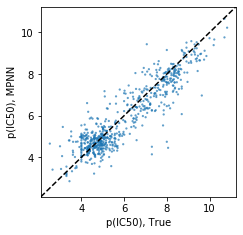

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

ax.scatter(y_true, y_pred, s=5, alpha=0.7, edgecolor='none')

ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')

ax.set_xlabel('p(IC50), True')
ax.set_ylabel('p(IC50), MPNN')